#### Predicción de Calidad del Vino (Core)

* Objetivo

* Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

In [1]:
# Carga de bibliotecas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# biblioteca google.
from google.colab import drive
# conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/WineQT.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.drop(columns='Id', inplace=True)

In [5]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile_acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric_acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual_sugar,1143.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free_sulfur_dioxide,1143.0,16.0,10.0,1.0,7.0,13.0,21.0,68.0
total_sulfur_dioxide,1143.0,46.0,33.0,6.0,21.0,37.0,61.0,289.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ph,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


#### Posible outliers en total_sulfur_dioxide, el procentil 75 es solo 61 y tiene un máximo de 289 y promedio 46.
#### Posible outlier en residual_sugar con un máximo de 16 y en el percentil 75 tiene 3 y con promedio 3.0.
#### Posible valor atipico en fixed_acidity, con un máximo de 16 y en percentil 75 tiene 9 y su promedo es 9.
#### Posible valor atipico en free_sulfur_dioxide, con máximo de 68 y en percentil 75 tiene 21 y su promedio es 16.0.

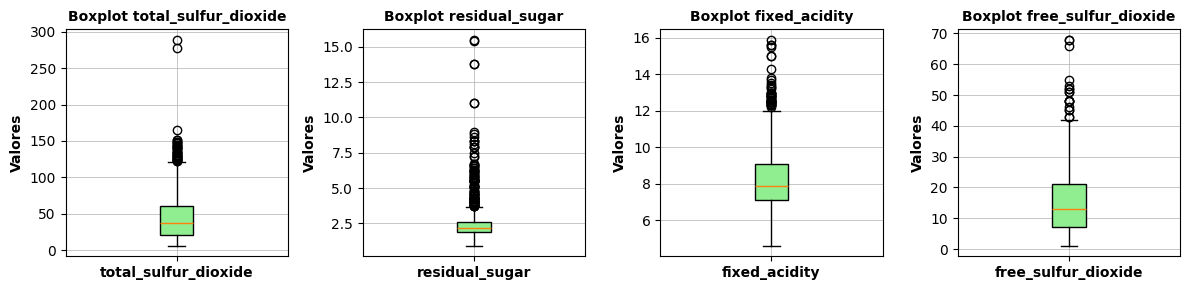

In [8]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(1,4, figsize=(12, 3))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
colum_num = ["total_sulfur_dioxide", "residual_sugar", "fixed_acidity", "free_sulfur_dioxide"]
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='lightgreen')
for i, col in enumerate(colum_num[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### Se verifica si los outliers son valores válidos.

In [9]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [13]:
df.corr().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.00,-0.24,0.67,0.17,0.10,-0.15,-0.10,0.68,-0.69,0.18,-0.08,0.12
volatile_acidity,-0.24,1.00,-0.54,-0.01,0.05,-0.01,0.07,0.03,0.23,-0.28,-0.21,-0.41
citric_acid,0.67,-0.54,1.00,0.18,0.25,-0.05,0.05,0.37,-0.55,0.35,0.10,0.24
residual_sugar,0.17,-0.01,0.18,1.00,0.06,0.15,0.19,0.36,-0.12,0.01,0.07,0.02
chlorides,0.10,0.05,0.25,0.06,1.00,0.01,0.04,0.21,-0.28,0.39,-0.23,-0.12
free_sulfur_dioxide,-0.15,-0.01,-0.05,0.15,0.01,1.00,0.66,-0.05,0.05,0.03,-0.06,-0.07
total_sulfur_dioxide,-0.10,0.07,0.05,0.19,0.04,0.66,1.00,0.05,-0.07,0.00,-0.20,-0.18
density,0.68,0.03,0.37,0.36,0.21,-0.05,0.05,1.00,-0.37,0.14,-0.50,-0.19
ph,-0.69,0.23,-0.55,-0.12,-0.28,0.05,-0.07,-0.37,1.00,-0.19,0.23,-0.06
sulphates,0.18,-0.28,0.35,0.01,0.39,0.03,0.00,0.14,-0.19,1.00,0.10,0.26


#### Preprocesamiento de Datos:

#### Se sacan de la muestra las columnas con outliers que tienen muy baja correlación con el target columna quality.

 "residual_sugar", "free_sulfur_dioxide"

In [14]:
# Separación de columnas
numeric_cols = ["fixed_acidity",	"volatile_acidity",	"citric_acid",	"chlorides",	"total_sulfur_dioxide",	"density",	"ph",	"sulphates", "alcohol"]


In [15]:
X = df.drop(columns=["quality", "residual_sugar", "free_sulfur_dioxide"])
y = df["quality"]

In [16]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modelo KNeighborsClassifier

In [17]:
# Preprocesador knn.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo knn.
pipeline_knn = Pipeline([
    ("preprocessing_knn", preprocessor_knn),
    ("model_knn", KNeighborsClassifier())
])

In [18]:
# Entrenamiento knn.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_knn',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('model_knn', KNeighborsClassifier())])

In [19]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
# Evaluación
# Calcular la precisión del modelo (métrica de clasificación)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
cm = confusion_matrix(y_test, y_pred_knn)
print(f"\nModelo KNeighborsClassifier")
print(f"\nAccuracy del modelo: {accuracy_knn:.2f}")
print(f"\nPrecisión del modelo: {precision:.2f}")
print(f"\nRecall del modelo: {recall:.2f}")
print(f"\nF1_Score del modelo: {f1:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm)


Modelo KNeighborsClassifier

Accuracy del modelo: 0.51

Precisión del modelo: 0.47

Recall del modelo: 0.51

F1_Score del modelo: 0.49

Matriz de Confusíon del modelo:
[[ 0  0  2  0  0  0]
 [ 0  0  7  5  0  0]
 [ 0  2 52 28  2  0]
 [ 0  2 20 42 10  0]
 [ 0  0  2 13 10  0]
 [ 0  0  0  2  5  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* En el Modelo KNeighborsClassifier, el accuracy con 0.51, significa que el modelo clasifica el 51% de las muestras, con un rendimiento modesto, sobre una muestra al azar.
* La precisión con 0.47, indica que en promedio, cuando el modelo predice una clase, solo es correcta el 47% de las veces. alto numero de falsos positivos.
* El Recall con 0.51 indica que el modelo solo identifica correctamente el 51% de las muestras de cada clase, en promedio. Casi la mitad de las muestras positivas no son detectadas.
* el F1 score con un valor 0.49 es consistente con los valores de precisión y Recall, lo que indica un equilibrio entre ambas métricas en un nivel bajo.
* En la matriz de confusión, las clase 0,1 tienen un rendimientomuy pobre.
la clase 2 es la mas numerosa con 84 muestras y tiene el mayor numero de aciertos con 52, pero un 38% de sus muestras se predijeron como clase 3.
La clase 3 es numerosa con 82 y tiene 42 aciertos, pero 20 se confunden con clase 2 y 18 con clase 4.  
La clase 4 tiene solo 10 aciertos de 25.
La clase 5 no tiene ningun acierto.
Conclusion : Hay un desiquilibrio de clases. El modelo no logra predecir las clases con menos muestras.
Confusion entre clases adycentes.

#### Validación cruzada para encontrar el mejor k en modelo KNeighborsClassifier

In [20]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='accuracy', cv=5)
    accuracy_scores.append(accuracy_scores)

# Seleccionar el K con el menor MSE
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f'Mejor valor de K: {best_k}')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Mejor valor de K: 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


#### Se aplica parametro K=1 a modelo KNeighborsClassifier

In [21]:
# Preprocesador knn.
preprocessor_knn2 = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo.
pipeline_knn2 = Pipeline([
    ("preprocessing_knn2", preprocessor_knn2),
    ("model_knn2", KNeighborsClassifier(n_neighbors=1))
])

In [22]:
# Entrenamiento.
pipeline_knn2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_knn2',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('model_knn2', KNeighborsClassifier(n_neighbors=1))])

In [23]:
# Prediccion.
y_pred_knn2 = pipeline_knn2.predict(X_test)

In [24]:
# Evaluación
accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)
precision_knn2 = precision_score(y_test, y_pred_knn2, average='weighted')
recall_knn2 = recall_score(y_test, y_pred_knn2, average='weighted')
f1_knn2 = f1_score(y_test, y_pred_knn2, average='weighted')
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
print(f"\nModelo KNeighborsClassifier Optimizado")
print(f"\nExactitud del modelo: {accuracy_knn2:.2f}")
print(f"\nPrecisión del modelo: {precision_knn2:.2f}")
print(f"\nSensibilidad del modelo: {recall_knn2:.2f}")
print(f"\nF1_Score del modelo: {f1_knn2:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm_knn2)


Modelo KNeighborsClassifier Optimizado

Exactitud del modelo: 0.44

Precisión del modelo: 0.43

Sensibilidad del modelo: 0.44

F1_Score del modelo: 0.43

Matriz de Confusíon del modelo:
[[ 0  1  0  1  0  0]
 [ 0  0  8  4  0  0]
 [ 0  5 44 33  2  0]
 [ 0  3 17 36 18  0]
 [ 0  0  3 12 10  0]
 [ 0  0  1  3  3  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


En el modelo KNeighborsClassifier, con parametro mejorado a 1, el accuracy con 0.44, el modelo clasifica solo el 44% de las muestras totales. Rendimiento significativo peor que el modelo anterior que tenia 51%, la optimización a degradado el desempeño.
* La precisión con 0.43 de todas las prediciones positivas hechas por el modelo, solo el 43% son correctas. Alta tasa de falsos positivos.
* El Recall con 0.44, el modelo solo detecta el 44% de las muestras totales positivas de cada clase. Grave problema con falsos negativos.
* El F1 score con valor 0.43 confirma el fracaso de equilibrar ambos aspectos de media armonica entre precisión y recall. El modelo no es confiable.
En matriz de confusión, clase 0 con cero aciertos, clase 1 con 4 muestras todas erroneas.
clase 2 con 33 de 82 muestras mal clasificadas como clase 3.
clase 3 con 17 de 56 muestras mal clasificadas como clase 2.
hay un sesgo hacia clases mayoritarias.
las clases 2 y 3 acaparan el 84% de las muestras, mientras el modelo ignora la clase 0 y 1.
* La optimizacion empeoro el modelo, todas las metricas se degradaron y la confusion entre clases se intensifico.



#### Modelo RandomForestClassifier

In [25]:
# Preprocesador RandomForesrClasifier
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo  RandomForesrClasifier
pipeline_forest = Pipeline([
    ("pp_forest", preprocessor_forest),
    ("modeloforest", RandomForestClassifier())
])

In [26]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('pp_forest',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('modeloforest', RandomForestClassifier())])

In [27]:
# Prediccion RandomForesrClasifier.
y_pred_forest = pipeline_forest.predict(X_test)

In [28]:
# Evaluación RandomForesrClasifier
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
cm_forest = confusion_matrix(y_test, y_pred_forest)
print(f"\nModelo RandomForestClassifier:")
print(f"\nAccuracy del modelo: {accuracy_forest:.2f}")
print(f"\nPrecisión del modelo: {precision_forest:.2f}")
print(f"\nRecall del modelo: {recall_forest:.2f}")
print(f"\nF1_Score del modelo: {f1_forest:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm_forest)


Modelo RandomForestClassifier:

Accuracy del modelo: 0.55

Precisión del modelo: 0.50

Recall del modelo: 0.55

F1_Score del modelo: 0.52

Matriz de Confusíon del modelo:
[[ 0  0  2  0  0  0]
 [ 0  0  8  4  0  0]
 [ 0  0 58 26  0  0]
 [ 0  1 23 43  7  0]
 [ 0  0  0 14 11  0]
 [ 0  0  0  5  2  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### En el modelo de RandomforestClassifier se observa en la metrica:
* El accuracy da 0.55, solo acierta en 55% de las predicciones.
* La precisión con  0.50, cuando predice una clase , solo es correcta el 49% de las veces.
* El Recall con  0.55, solo detecta el 54% de los casos positivos reales.* El F1 score con un 0.52, con una combinación pobre de precisión y recall.
* El modelo no es confiable.
* En la matriz de confusión las clases 0,1,4 y 5 nunca son predichas.
  El modelo solo predice la clase 2 y 3.
  La clase 2 con 50 aciertos, pero 25 errores.
  Clase 3 con 45 aciertos, pero 25 errores.
  Hay falsos negativos extremos.
  clase con 2 muestras todas mal clasificadas.
  clase 1 con 12 muestras ninguna correcta.
  clase 4 y 5 con casi nula detección.
  Hay un desiquilibrio severo de clases. Caracteristicas inadecuadas. hiperparametros no optimizados.
#### El modelo no es funcional  


#### Se aplica validación cruzada para encontrar el mejor Nro de estimadores en modelo RandomForestClassifier.

In [29]:
# Probar diferentes valores de K
k_values = list(range(100, 300))
accuracy_scores = []

for k in k_values:
    forest = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(pipeline_forest, X_train, y_train, scoring='accuracy', cv=5)
    accuracy_scores.append(accuracy_scores)

# Seleccionar el K con el menor MSE
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f'Mejor valor de K: {best_k}')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Mejor valor de K: 100


#### Se aplica GridSearch, para encontrar el mejor Nro de estimadores en modelo RandomForesClassifier.

In [30]:
# Optimizacion de hiperparametros con GrisSearch.
forest_params = {
    "modeloforest__n_estimators": [50, 100, 200]
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=3, scoring="accuracy", n_jobs=-1)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp_forest',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid',
                                                                          'chlorides',
                                                                          'total_sulfur_dioxide',
                                                                          'density',
                                                                          'ph',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('modeloforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'modeloforest__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Classifier")
print("Mejores parámetros:", forest_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))

Forest Classifier
Mejores parámetros: {'modeloforest__n_estimators': 100}
Accuracy: 0.5490196078431373


#### El Gridsearch arroja que el mejor numero de estimadores para RandomforestClassifer es 100 con un accuract de 54%.

#### Modelo RandomForestClassifier con parametros optimizados

In [32]:
# Preprocesador RandomForesrClasifier
preprocessor_forest2 = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo  RandomForesrClasifier
pipeline_forest2 = Pipeline([
    ("pp_forest2", preprocessor_forest),
    ("modeloforest2", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [33]:
# Entrenamiento.
pipeline_forest2.fit(X_train, y_train)

Pipeline(steps=[('pp_forest2',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('modeloforest2', RandomForestClassifier(random_state=42))])

In [34]:
# Prediccion RandomForesrClasifier.
y_pred_forest2 = pipeline_forest2.predict(X_test)

In [35]:
 #Evaluación RandomForesrClasifier
accuracy_forest2 = accuracy_score(y_test, y_pred_forest2)
precision_forest2 = precision_score(y_test, y_pred_forest2, average='weighted')
recall_forest2 = recall_score(y_test, y_pred_forest2, average='weighted')
f1_forest2 = f1_score(y_test, y_pred_forest, average='weighted')
cm_forest2 = confusion_matrix(y_test, y_pred_forest2)
print(f"\nModelo RandomForestClassifier:")
print(f"\nAccuracy del modelo: {accuracy_forest2:.2f}")
print(f"\nPrecisión del modelo: {precision_forest2:.2f}")
print(f"\nRecall del modelo: {recall_forest2:.2f}")
print(f"\nF1_Score del modelo: {f1_forest2:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm_forest2)


Modelo RandomForestClassifier:

Accuracy del modelo: 0.54

Precisión del modelo: 0.49

Recall del modelo: 0.54

F1_Score del modelo: 0.52

Matriz de Confusíon del modelo:
[[ 0  0  1  1  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0 59 25  0  0]
 [ 0  1 24 40  9  0]
 [ 0  0  0 13 12  0]
 [ 0  0  0  5  2  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### El rendimiento del modelo RandomForestClassifier es muy deficiente:
* El accuracy con 54%, el modelo acierta solo un poco mas del 50%.
* La precisión con 49%, lo que el modelo predice como positivo, el 49% es correcto.
* El Recall con 54%, solo detecta el 54% de los casos positivos reales.
*El F1 score con un 52% es muy bajo.
* En la matriz de confusión la estructura fragmentada sugiere un problema de 3 clases.
* Clase 1 con 36 casos mas clasificados como clase 3.
* clase 2 con 27 casos de 28 erroneos, clasificados como clase 3.
* clase 3 con solo 4 aciertos y posiblemente mas errores.
#### El modelo no es predictivo por su bajo rendimiento.


#### Modelo de LogisticRegression

In [36]:
# Preprocesador de LogisticRegression.
preprocessor_lg = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo LogisticRegression.
pipeline_lg = Pipeline([
    ("preprocessinglg", preprocessor_lg),
    ("modellg", LogisticRegression())
])

In [37]:
# Entrenamiento LogisticRegression.
pipeline_lg.fit(X_train, y_train)

Pipeline(steps=[('preprocessinglg',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('modellg', LogisticRegression())])

In [38]:
# Prediccion LogisticRegression.
y_pred_lg = pipeline_lg.predict(X_test)

In [39]:
 #Evaluación LogisticRegression
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg, average='weighted')
recall_lg = recall_score(y_test, y_pred_lg, average='weighted')
f1_lg = f1_score(y_test, y_pred_lg, average='weighted')
cm_lg = confusion_matrix(y_test, y_pred_lg)
print(f"\nModelo LogisticRegression:")
print(f"\nAccuracy del modelo: {accuracy_lg:.2f}")
print(f"\nPrecisión del modelo: {precision_lg:.2f}")
print(f"\nRecall del modelo: {recall_lg:.2f}")
print(f"\nF1_Score del modelo: {f1_lg:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm_forest2)


Modelo LogisticRegression:

Accuracy del modelo: 0.54

Precisión del modelo: 0.49

Recall del modelo: 0.54

F1_Score del modelo: 0.51

Matriz de Confusíon del modelo:
[[ 0  0  1  1  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0 59 25  0  0]
 [ 0  1 24 40  9  0]
 [ 0  0  0 13 12  0]
 [ 0  0  0  5  2  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Rendimiento del modelo LogisticRegression.
* El accuracy con un 54% de precisión global. rendimiento modesto.
* La precisión. solo el 49% de las prediciones positivas son correctas.
* El Recall, solo identifica correctamente el 54% de las muestras reales.
* El F1 score  con un 0.51, confirma que el modelo tiene un equilibrio bajo, no es confiable para predicir las clases.
* LA matriz de confusión con clase 0 y 1 con un rendimiento probre.
La clase 2 tiene un mayor numero de aciertos de 58, pero con 26 se predicen incorrectamente.
La clase 3 tiene 38 acietos, pero tambien con muchos errores.
#### El modelo, al igual que los modelos anteriores, muestra un rendimiento deficiente.
Quizas las caracteristicas eliminadas eran importantes para predicción de algunas clases, a pesar de su baja correlación general.

#### Se aplica GridSearch, para encontrar mejores parametros en modelo LogisticRegression.

In [40]:
# Optimizacion de hiperparametros con GrisSearch.
logr_params = {
    "modellg__max_iter": [50, 100, 200]
}

logr_grid = GridSearchCV(pipeline_lg, logr_params, cv=3, scoring="accuracy", n_jobs=-1)
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessinglg',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid',
                                                                          'chlorides',
                                                                          'total_sulfur_dioxide',
                                                                          'density',
                                                                          'ph',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('modellg', LogisticRegression())]),
             n_jobs=-1, param_grid={'modellg__max_iter': [50, 100, 200]},
             scoring='accuracy')

In [41]:
# Evaluación.
logr_best = logr_grid.best_estimator_
y_pred_logr = logr_best.predict(X_test)

print("\nLogisticRegression.")
print("Mejores parámetros:", logr_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_logr))


LogisticRegression.
Mejores parámetros: {'modellg__max_iter': 100}
Accuracy: 0.5441176470588235


### En el modelo de LogisticRegression al usar GridSearch se obtuvo como mejor parametro max_iter de 100.

#### Modelo LogisticRegression con parametros optimizados.

In [42]:
# Preprocesador de LogisticRegression.
preprocessor_lg2 = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols)
])

# Modelo LogisticRegression.
pipeline_lg2 = Pipeline([
    ("preprocessing2", preprocessor_lg2),
    ("modellg2", LogisticRegression(max_iter=100, random_state=42))
])

In [43]:
# Entrenamiento LogisticRegression.
pipeline_lg2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid', 'chlorides',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('modellg2', LogisticRegression(random_state=42))])

In [44]:
# Prediccion RLogisticRegression.
y_pred_lg2 = pipeline_lg2.predict(X_test)

In [ ]:
 #Evaluación LogisticRegression
accuracy_lg2 = accuracy_score(y_test, y_pred_lg2)
precision_lg2 = precision_score(y_test, y_pred_lg2, average='weighted')
recall_lg2 = recall_score(y_test, y_pred_lg2, average='weighted')
f1_lg2 = f1_score(y_test, y_pred_lg2, average='weighted')
cm_lg2 = confusion_matrix(y_test, y_pred_lg2)
print(f"\nModelo LogisticRegression optimizado")
print(f"\nAccuracy del modelo: {accuracy_lg2:.2f}")
print(f"\nPrecisión del modelo: {precision_lg2:.2f}")
print(f"\nRecall del modelo: {recall_lg2:.2f}")
print(f"\nF1_Score del modelo: {f1_lg2:.2f}")
print(f"\nMatriz de Confusíon del modelo:")
print(cm_lg2)


Modelo LogisticRegression optimizado

Accuracy del modelo: 0.54

Precisión del modelo: 0.49

Recall del modelo: 0.54

F1_Score del modelo: 0.51

Matriz de Confusíon del modelo:
[[ 0  0  2  0  0  0]
 [ 0  0  7  5  0  0]
 [ 0  0 60 24  0  0]
 [ 0  0 28 43  3  0]
 [ 0  0  0 17  8  0]
 [ 0  0  0  4  3  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### El Modelo LogisticRegression con su parametro max_tier optimizado a 100 no mejoro su rendimiento.
* El accuracy con 54% solo predice correctamente poco más de la mitad de las muestras. La optimización no mejoro este aspecto.
* La precisión y el Recall son bajos alrededor de 49% y 54% respectivamente. Esto significa que hay un número significativo de falsos positivos y falsos negativos.
* EL F1 scores es bajo con 0.51, confirma que al igua que el modelo anterior, tienen un equilibro pobre entre precisión y recall, no son confiables para predecir clases.
* La matriz de confusión, se observa un un rendimiento muy deficiente en las clases minoritarias como 0,1,4 y 5, con muy pocos o ningun acierto.
* La optimización no corrigio estos problemas de clasificasión.

#### Se crea y visualiza la curva ROC y se calcula el AUC para el modelo de clasificasión RandomForestClassfier.


AUC: 0.699


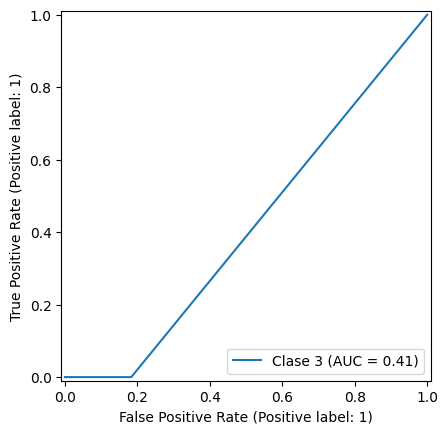

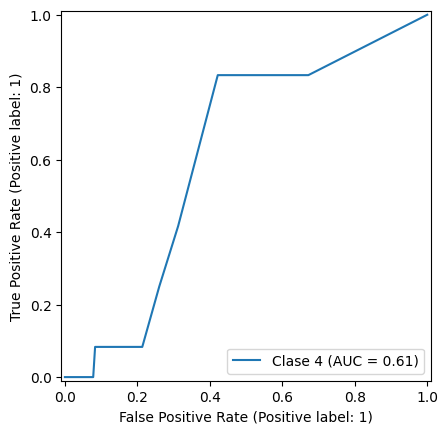

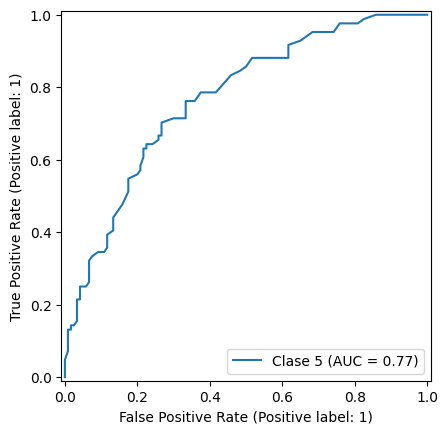

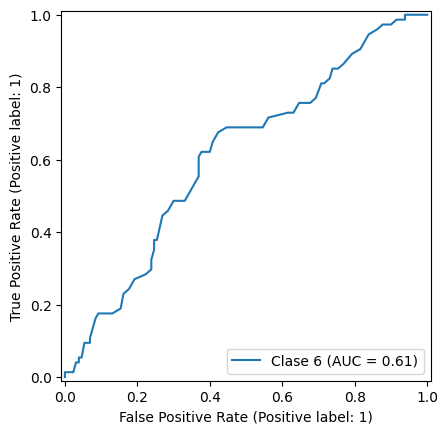

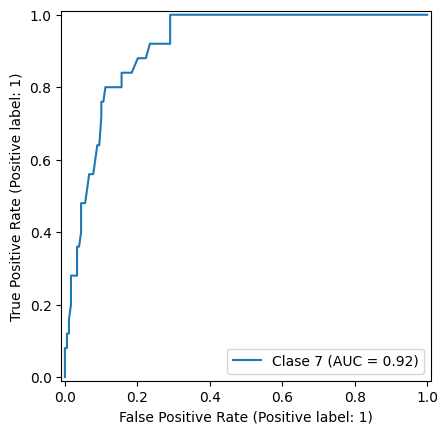

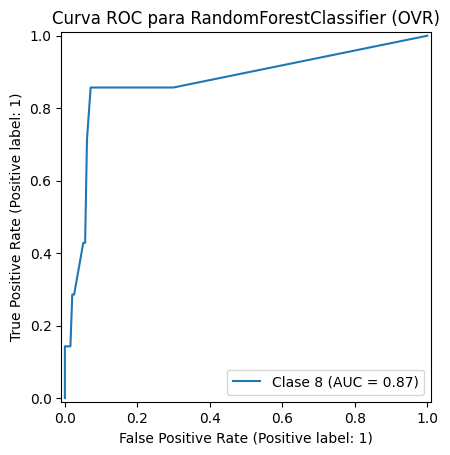

In [45]:
# Obtener probabilidades para todas las clases
y_proba = pipeline_forest.predict_proba(X_test)

# Calcular AUC para multi-class usando 'ovr' (uno contra el resto)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"AUC: {auc:.3f}")

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

for i in range(y_proba.shape[1]):
    # Ajustar los nombres de las clases si es necesario (las clases en el dataframe son 3-8)
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_proba[:, i], name=f'Clase {i+3}')

plt.title("Curva ROC para RandomForestClassifier (OVR)")
plt.show()

#### Comparación de Modelos:

Se evaluo los modelos utilizando Accuracy, Precision, Recall, F1-Score y la Matriz de Confusión.
Resumen de las metricas:

KNeighborsClassifier (Original):
* Accuracy: 0.51
* Precision: 0.47
* Recall: 0.51
* F1-Score: 0.49

* Matriz de Confusión: Rendimiento pobre en clases minoritarias (0, 1, 4, 5), confusión significativa entre clases adyacentes (especialmente 2 y 3).

RandomForestClassifier (Original):
* Accuracy: 0.55
* Precision: 0.50
* Recall: 0.55
* F1-Score: 0.52
* Matriz de Confusión: No predice clases minoritarias (0, 1, 4, 5), principalmente predice clases mayoritarias (2 y 3), con errores significativos dentro de estas clases.

LogisticRegression (Original y Optimizado):
* Accuracy: 0.54
* Precision: 0.49
* Recall: 0.54
* F1-Score: 0.51
* Matriz de Confusión: Rendimiento deficiente en clases minoritarias (0, 1, 4, 5), la mayoría de las predicciones se concentran en las clases mayoritarias (2 y 3), con confusión entre ellas.

#### ¿Cuál modelo ofrece el mejor rendimiento y por qué?

* Basándose en las métricas de Accuracy, Recall y F1-Score, el RandomForestClassifier sin optimización, tiene un rendimiento un poco superior en comparación con los otros modelos.

* Es importante analizar las matrices de confusión. porque todos los modelos muestran dificultad para predecir las clases minoritarias (0, 1, 4, 5).
*  Prácticamente todas las predicciones se concentran en las clases mayoritarias (2 y 3).
* Los modelos no están aprendiendo a distinguir entre las clases menos frecuentes.
* El RandomForestClassifier tiene métricas ligeramente mejores en general, pero su debilidad principal es que ignora por completo las clases minoritarias en sus predicciones.

### Conclusión General:

El problema principal que enfrentan todos los modelos es el severo desequilibrio de clases en el conjunto de datos. Las clases de calidad de vino con pocas muestras (3, 4, 7, 8) son muy difíciles de predecir correctamente, ya que los modelos tienden a favorecer las clases con más ejemplos (5 y 6). Además, la baja correlación de algunas características eliminadas podría haber impactado la capacidad de los modelos para discriminar entre clases.

Para mejorar el rendimiento, es fundamental abordar el desequilibrio de clases, explorar en las caracteristicas o ver modelos más avanzados, para mejorar esta situación.
